<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Alireza Belal
    
    
____


### Full Name : Ali Nazari
### Student Number : 99102401
___

# Setup

# 0. Preparation

In this part, you will use a dataset related to COVID-19. Load your dataset using pandas.

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('./Covid Dataset.csv')
categorical_feature_mask = covid_data.dtypes == object
cateforical_cols = covid_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
covid_data[cateforical_cols] = covid_data[cateforical_cols].apply(lambda col: le.fit_transform(col))
covid_data = covid_data.astype(float)

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)

---------------

# 1. DNN as nonlinear dimensionality reduction method (50 Points)

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html).
(It would be ok to use PyTorch as well.)
Reduce the dimension of the data to 2 dimensions and visualize the low-dimensional data.

In [70]:
import torch
import torch.utils.data as data_utils
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [71]:
dataset = data_utils.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
train_loader = data_utils.DataLoader(dataset, batch_size=32, shuffle=True)
dataset = data_utils.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = data_utils.DataLoader(dataset, batch_size=32)

In [72]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(20, 10), nn.ReLU(), nn.Linear(10,5), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(5,10), nn.ReLU(), nn.Linear(10,20))
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [73]:
model = AutoEncoder()
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_plot = []
num_epochs = 20
for epoch in range(num_epochs):
    total_loss = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(torch.float32)
        optimizer.zero_grad()
        model_outputs = model(inputs)
        loss = criteria(model_outputs, inputs)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    loss_plot.append(total_loss / len(X_train))
    print(f'TRAIN - epoch: {epoch+1}, loss: {loss_plot[-1]}')

TRAIN - epoch: 1, loss: 0.012955541081595289
TRAIN - epoch: 2, loss: 0.007083028249291724
TRAIN - epoch: 3, loss: 0.006119599890589808
TRAIN - epoch: 4, loss: 0.00608167992652544
TRAIN - epoch: 5, loss: 0.006060637073268585
TRAIN - epoch: 6, loss: 0.006030385862705804
TRAIN - epoch: 7, loss: 0.005794884416105996
TRAIN - epoch: 8, loss: 0.005632351072029537
TRAIN - epoch: 9, loss: 0.005536243507588126
TRAIN - epoch: 10, loss: 0.005328060912672169
TRAIN - epoch: 11, loss: 0.00511290397482297
TRAIN - epoch: 12, loss: 0.005034551377080787
TRAIN - epoch: 13, loss: 0.004992883510411553
TRAIN - epoch: 14, loss: 0.004959926287374966
TRAIN - epoch: 15, loss: 0.0049331211515580104
TRAIN - epoch: 16, loss: 0.004907716309557204
TRAIN - epoch: 17, loss: 0.004878388269619035
TRAIN - epoch: 18, loss: 0.004853097868379467
TRAIN - epoch: 19, loss: 0.004835044161413896
TRAIN - epoch: 20, loss: 0.004809066692434296


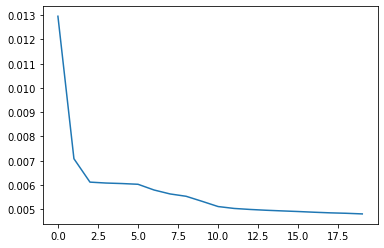

In [74]:
plt.plot(loss_plot)
plt.show()

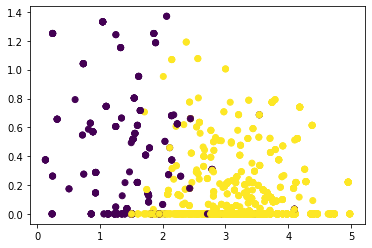

In [75]:
real_labels = []
predicted_labels = []
for input, label in test_loader:
    real_labels.append(label.detach().numpy())
    input = input.to(torch.float32)
    latency = model.encoder(input)
    predicted_labels.append(latency.detach().numpy())
plt.scatter(np.concatenate(predicted_labels)[:,0], np.concatenate(predicted_labels)[:,1], c=np.concatenate(real_labels))